## Objective
Study extent of kilosort's undermerging of units

## General setup

In [1]:
%load_ext autoreload

In [9]:
from multiprocessing import Pool

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

%autoreload 2
from src import utils
from src.sorters.kilosort import get_experts_kilosort
from src.comparison import Comparison

In [26]:
RECORDING = utils.rec_si()
CHANS_RMS = utils.chans_rms_si()

/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'hdmf-common' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])
/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'core' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])


Recording does not have scaled traces. Setting gain to 0.195


In [4]:
KILOSORT = get_experts_kilosort()

/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'hdmf-common' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])
/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'core' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])
/data/MEAprojects/PropSignal/src/comparison.py:331: UserWarning: Using Comparison.count_matching_events_si which may be inaccurate
  warnings.warn("Using Comparison.count_matching_events_si which may be inaccurate", UserWarning)
/data/MEAprojects/PropSignal/src/sorters/kilosort.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the n

Recording does not have scaled traces. Setting gain to 0.195


In [14]:
# Get kilosort units' max channels
NUM_WFS = 300
MS_BEFORE = 2
MS_AFTER = 2

np.random.seed(231)
##
ks_units = [unit for unit in KILOSORT]

def extract_templates(unit_idx):
    unit = ks_units[unit_idx]
    return unit_idx, unit.get_templates(num_wfs=NUM_WFS, ms_before=MS_BEFORE, ms_after=MS_AFTER)

with Pool(processes=12) as pool:
    for unit_idx, templates in tqdm(pool.imap(extract_templates, range(len(ks_units))), total=len(ks_units)):
        ks_units[unit_idx].templates = templates
        ks_units[unit_idx].chan = np.argmin(np.min(templates, axis=1))
        
elec_to_units = {}
for unit in ks_units:
    if unit.chan in elec_to_units:
        elec_to_units[unit.chan].append(unit)
    else:
        elec_to_units[unit.chan] = [unit]

100%|██████████| 226/226 [01:18<00:00,  2.87it/s]


## Plot footprints of units that share same max electrode

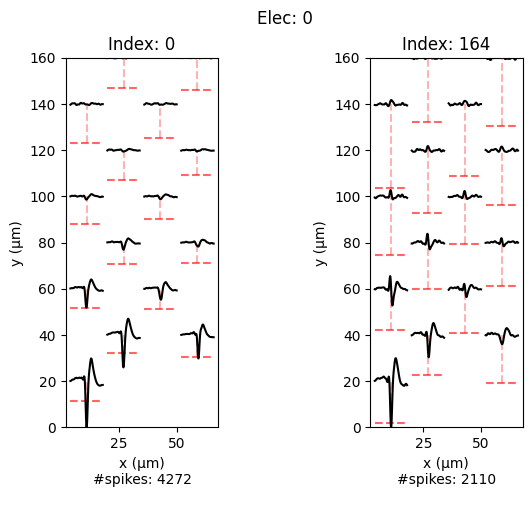

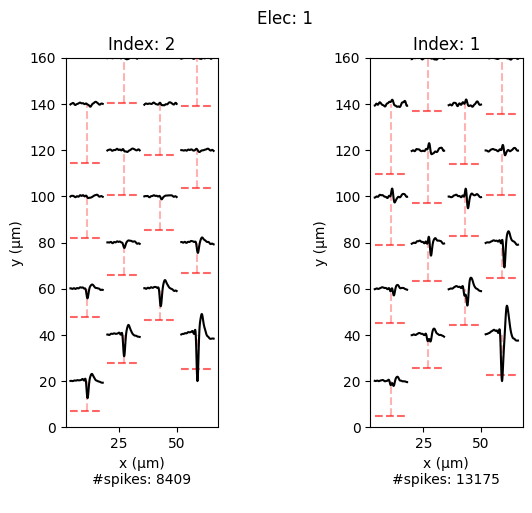

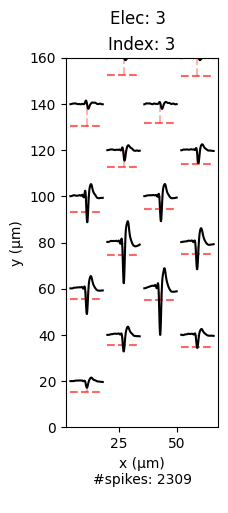

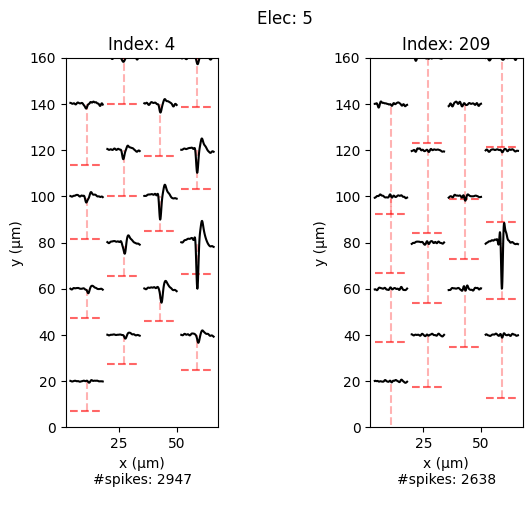

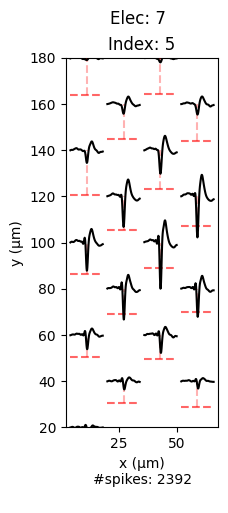

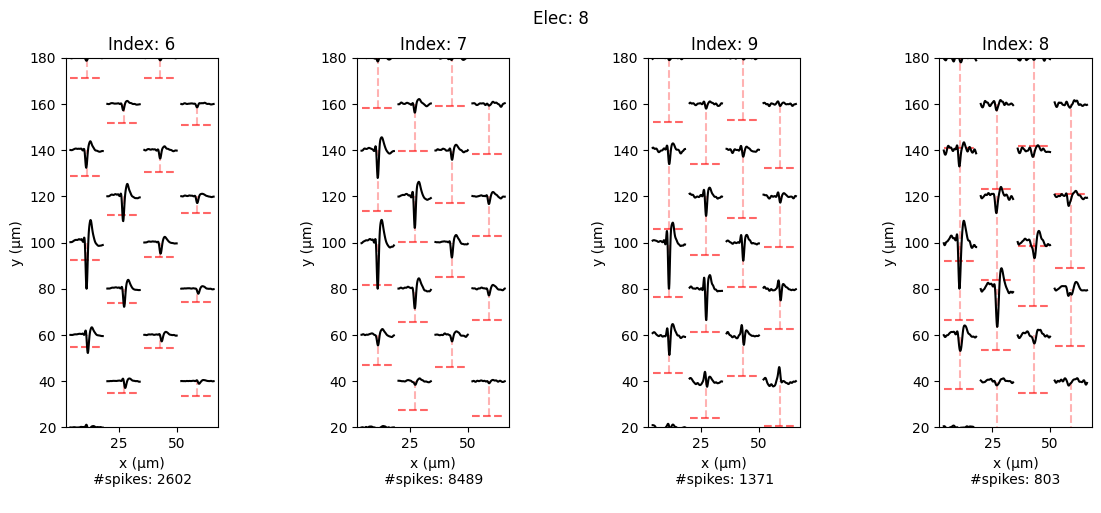

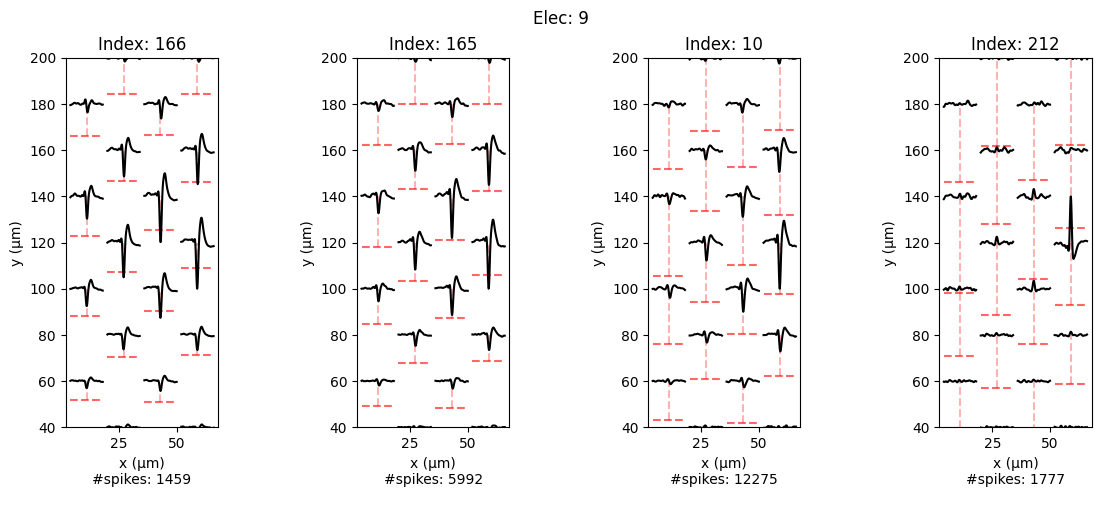

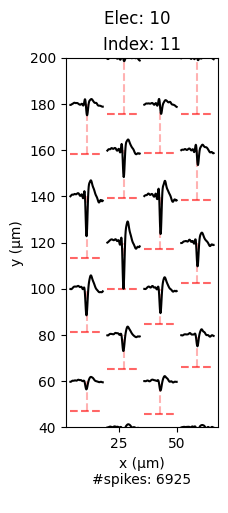

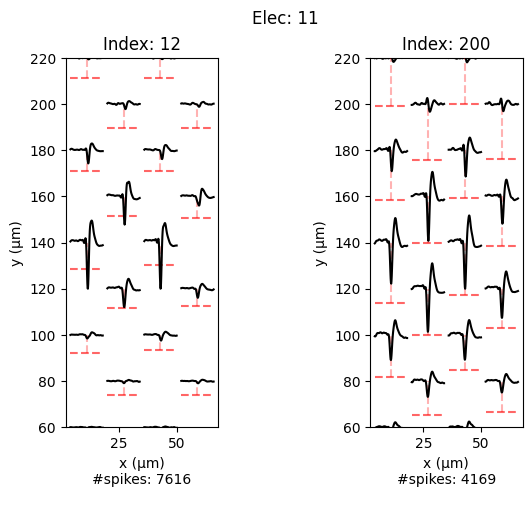

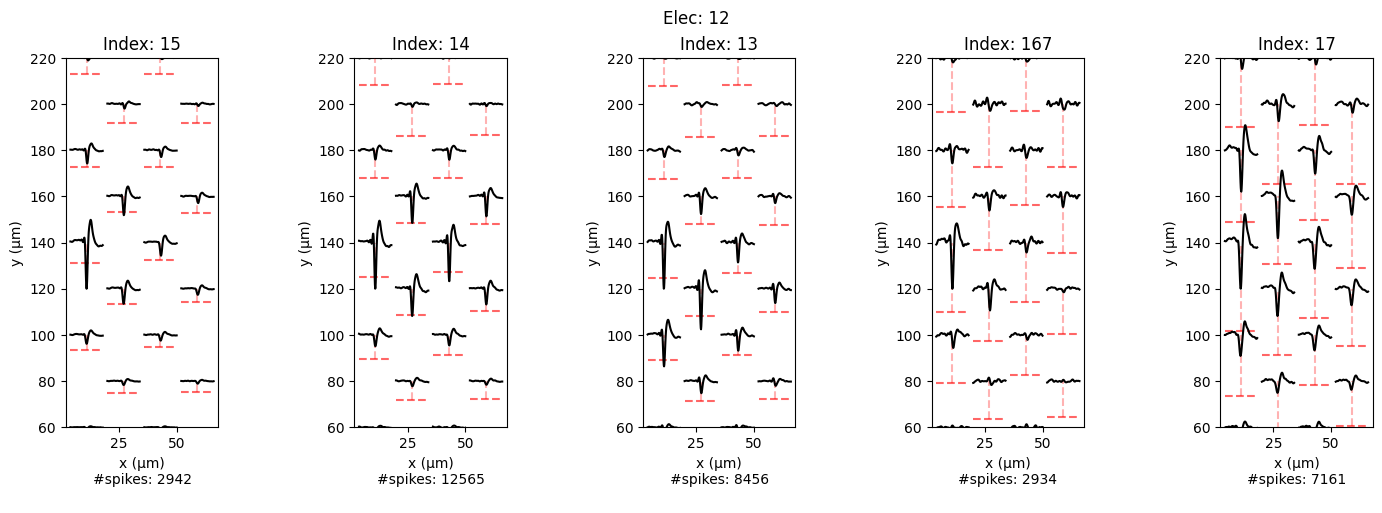

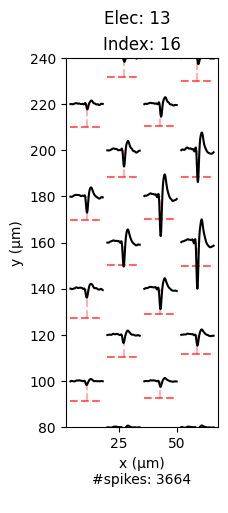

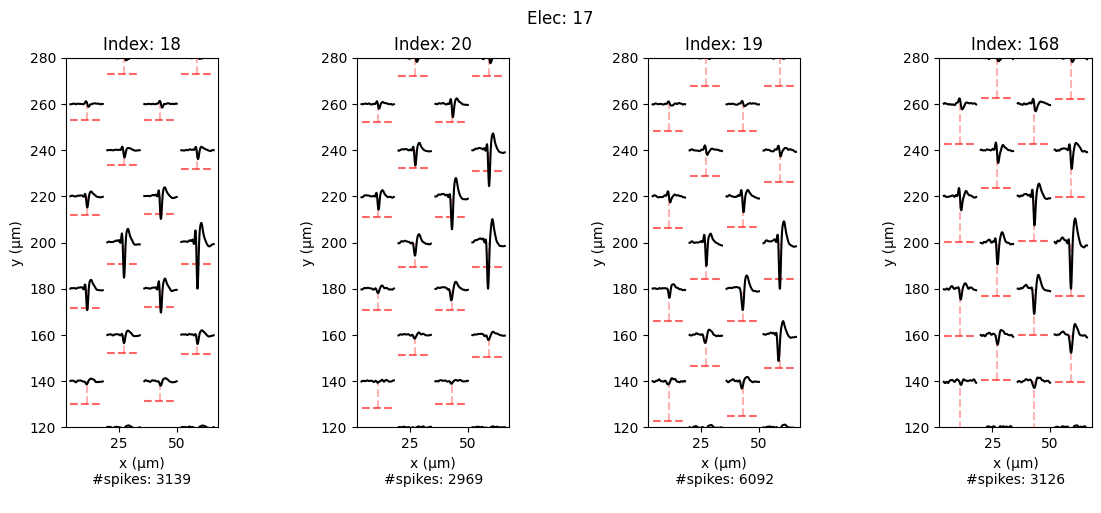

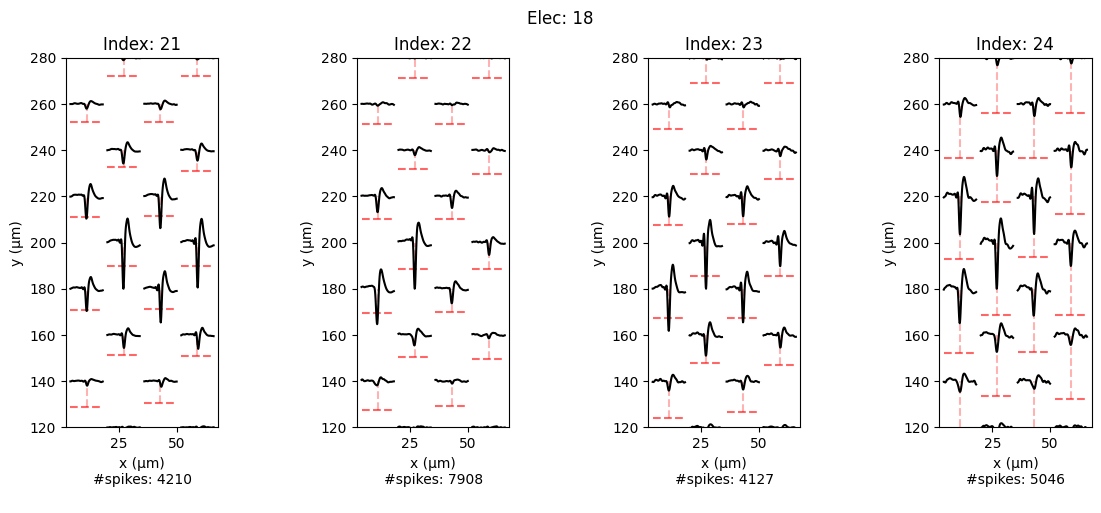

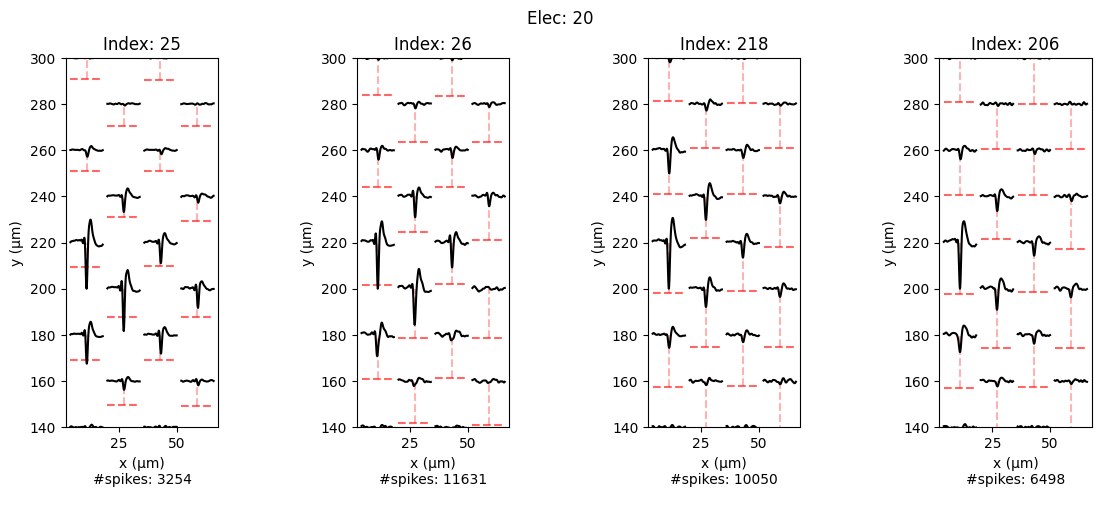

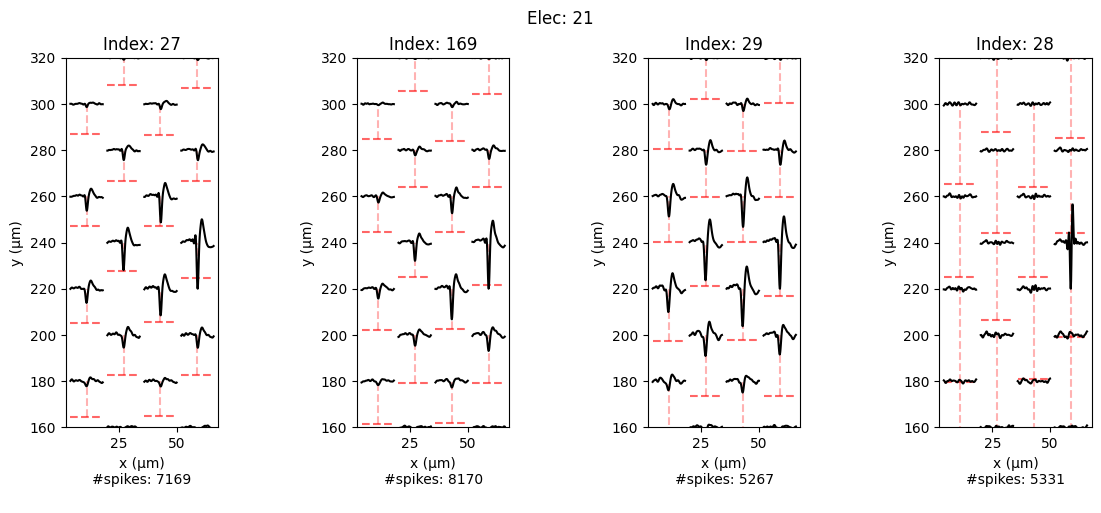

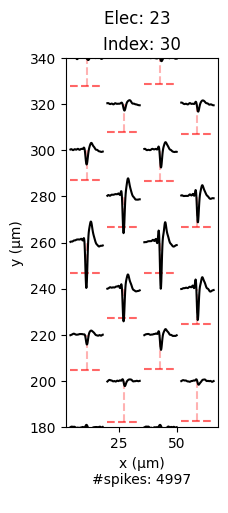

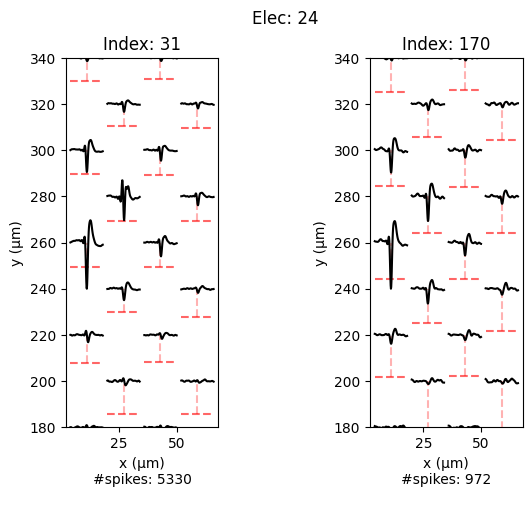

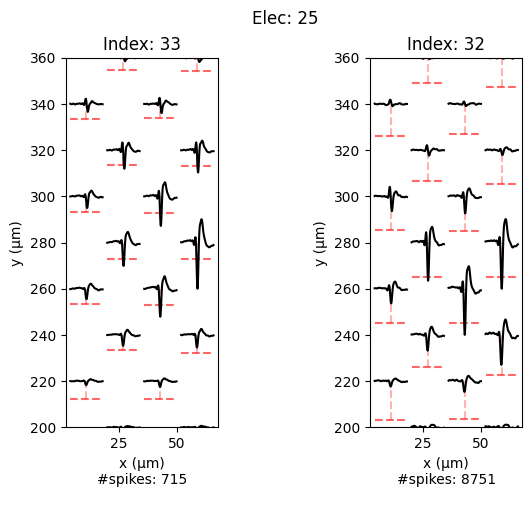

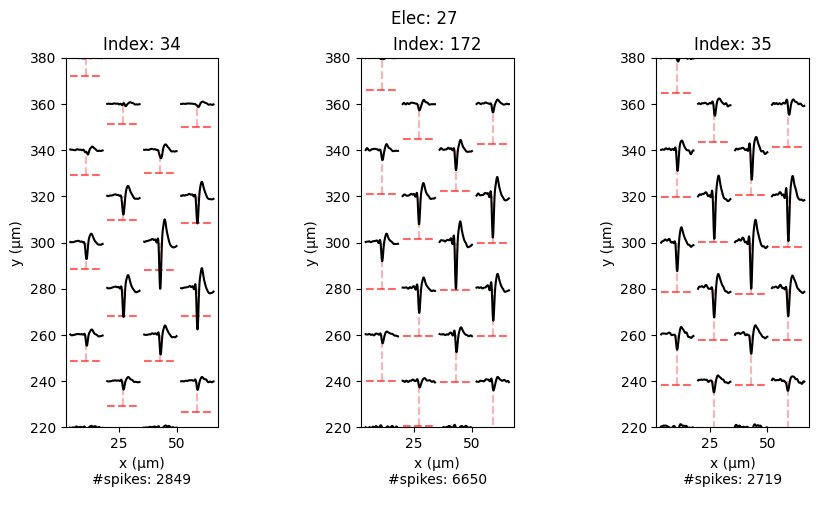

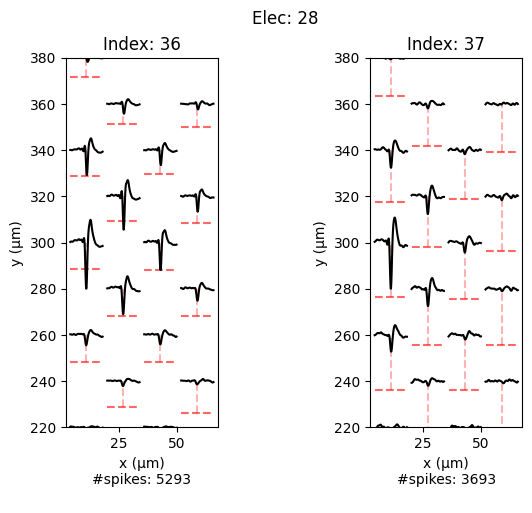

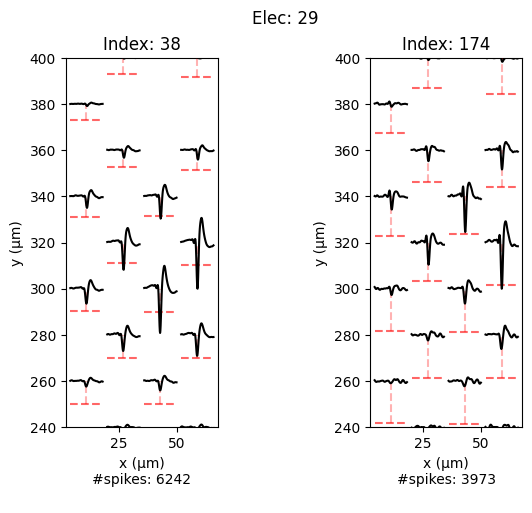

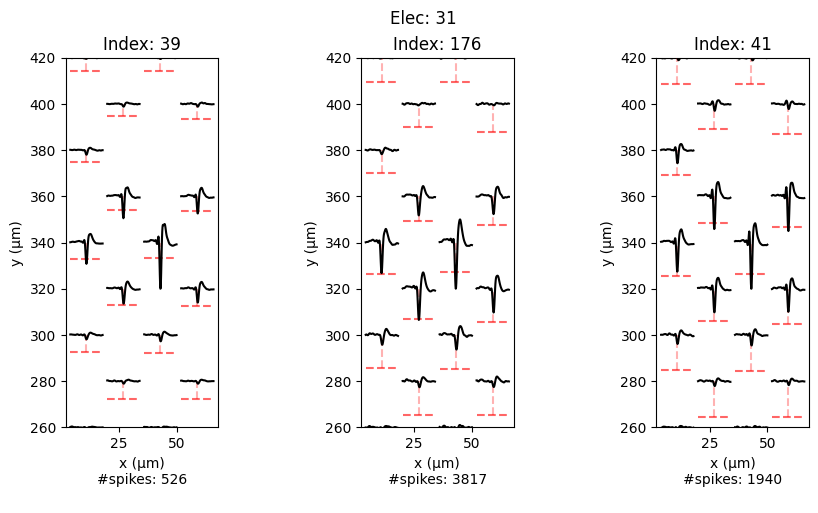

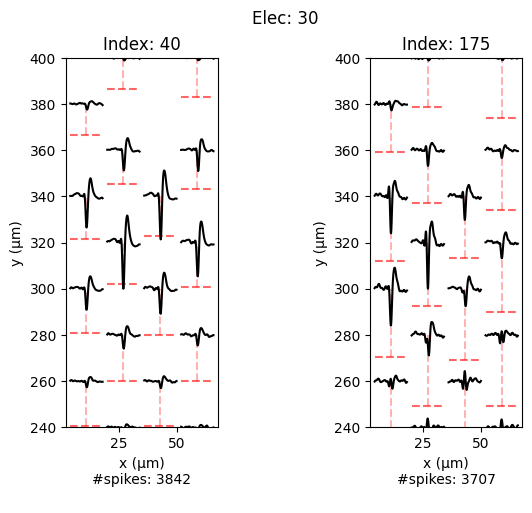

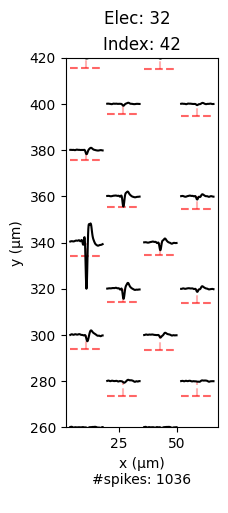

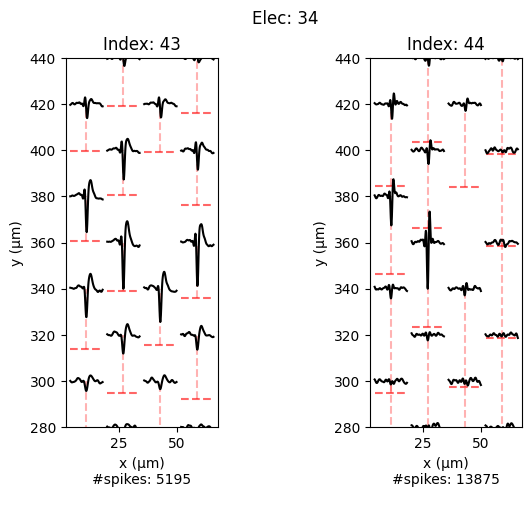

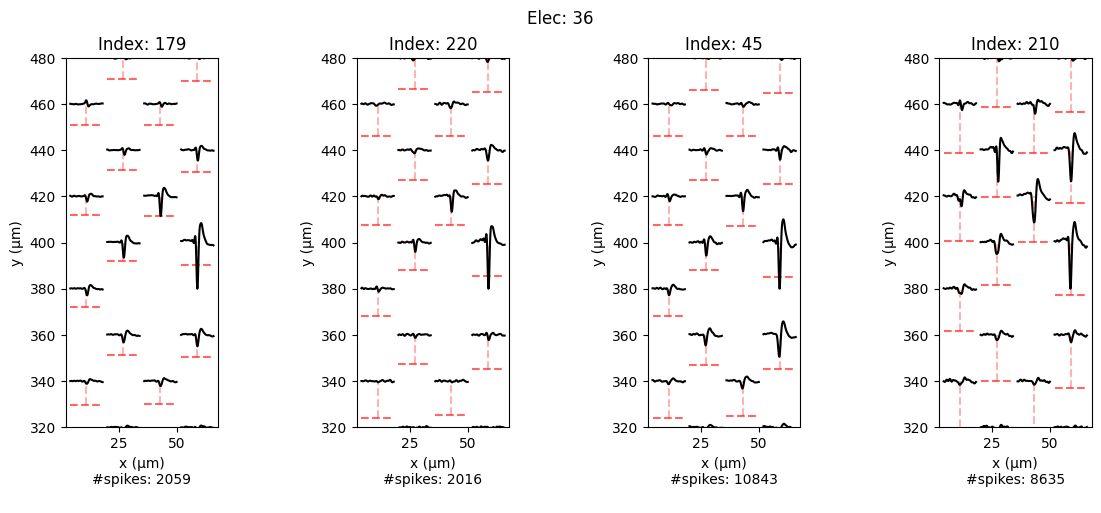

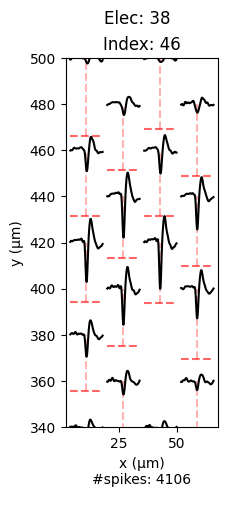

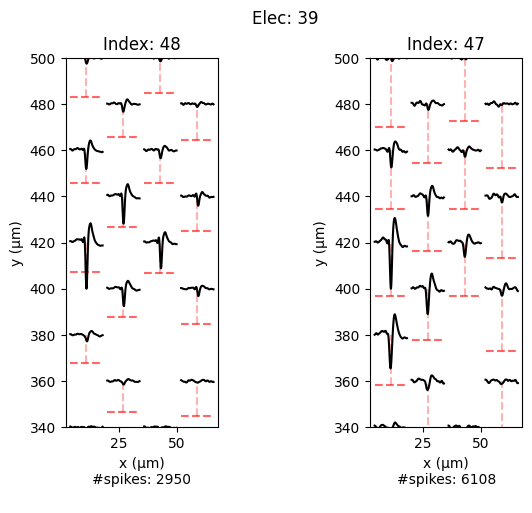

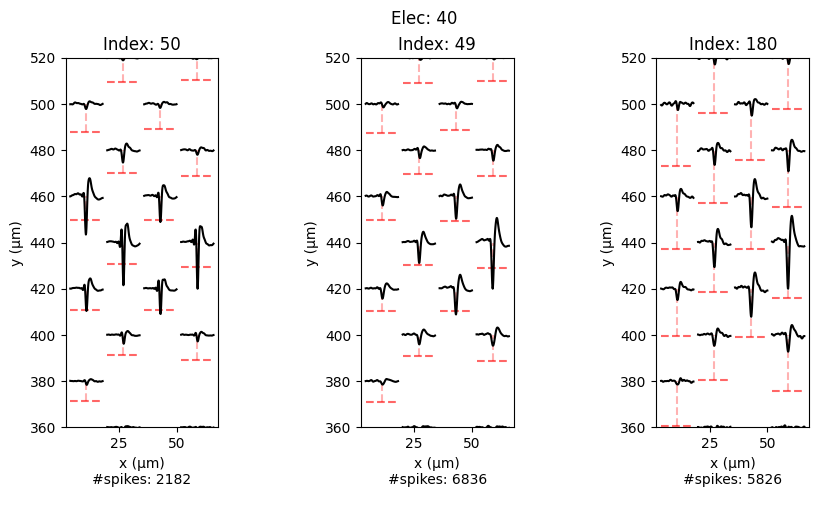

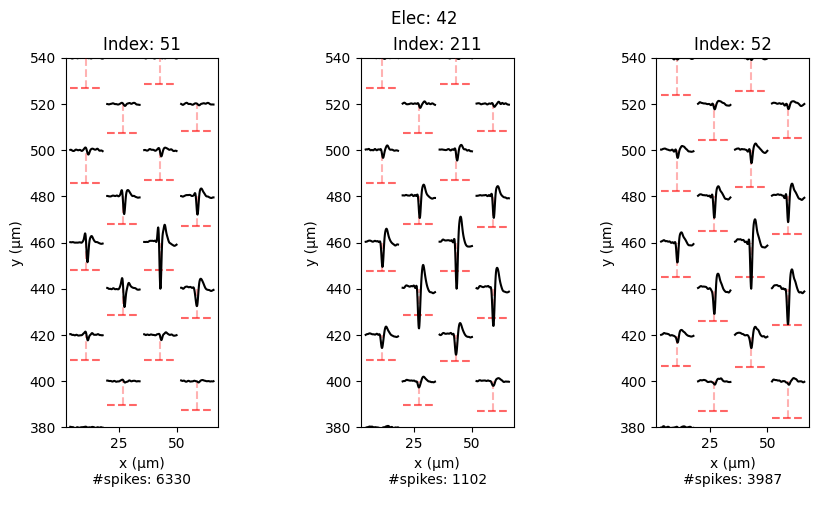

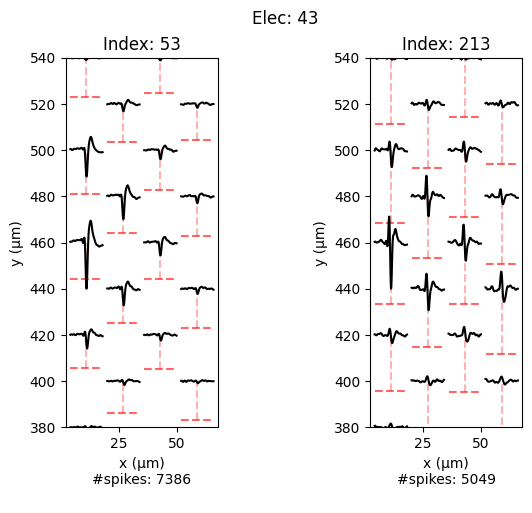

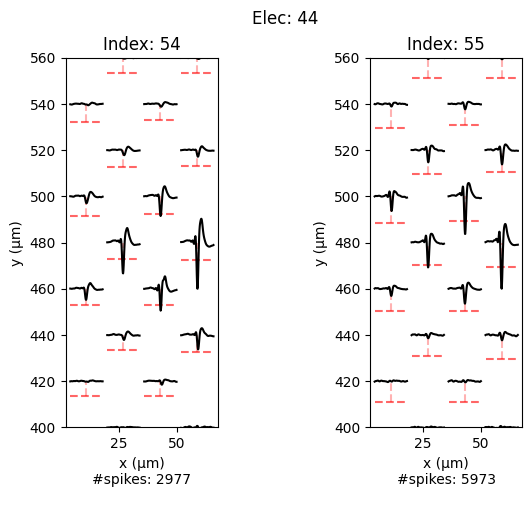

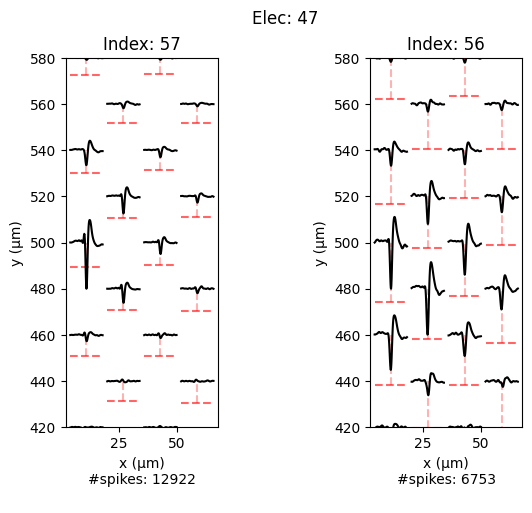

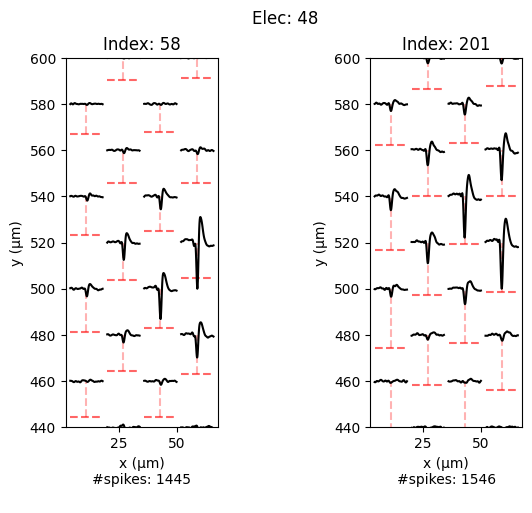

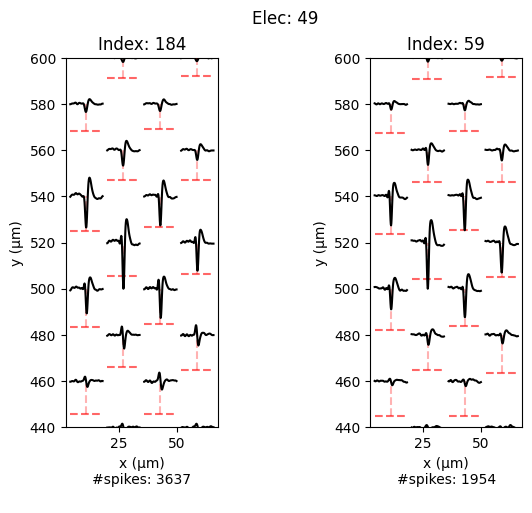

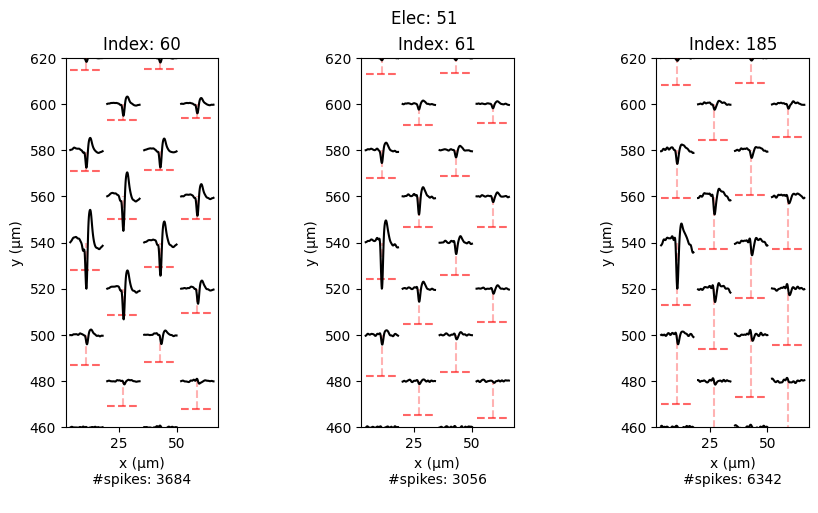

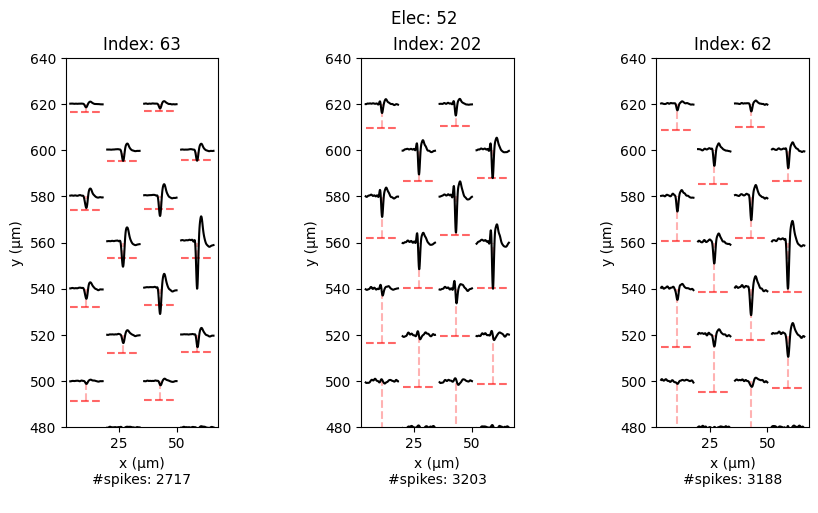

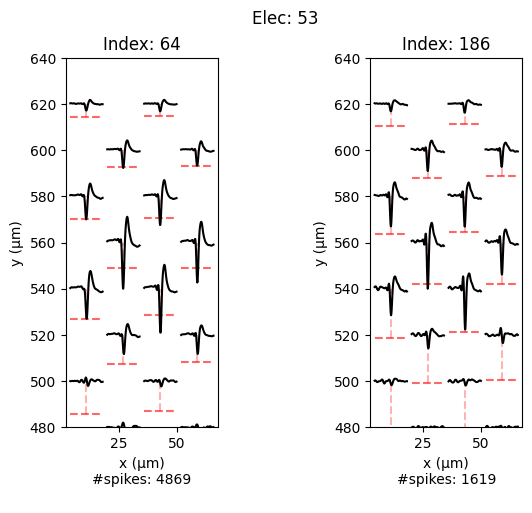

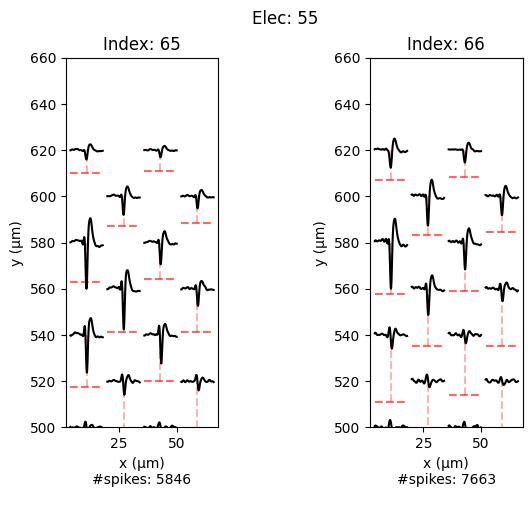

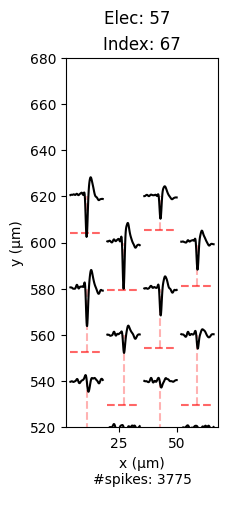

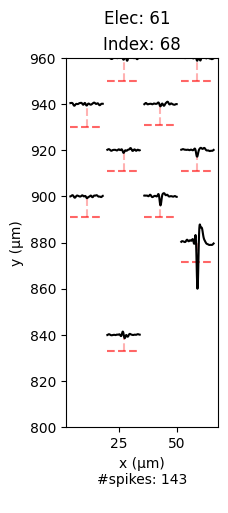

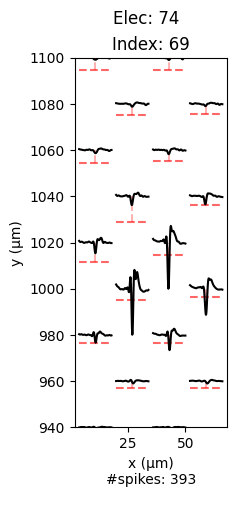

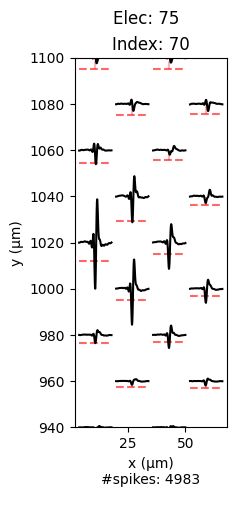

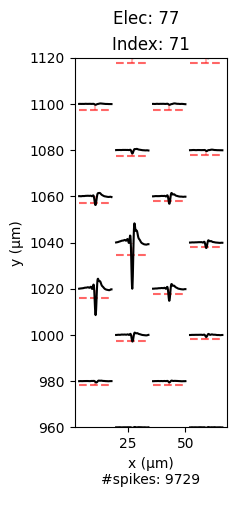

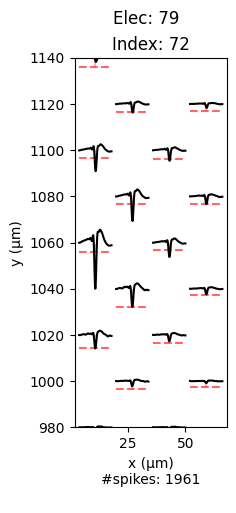

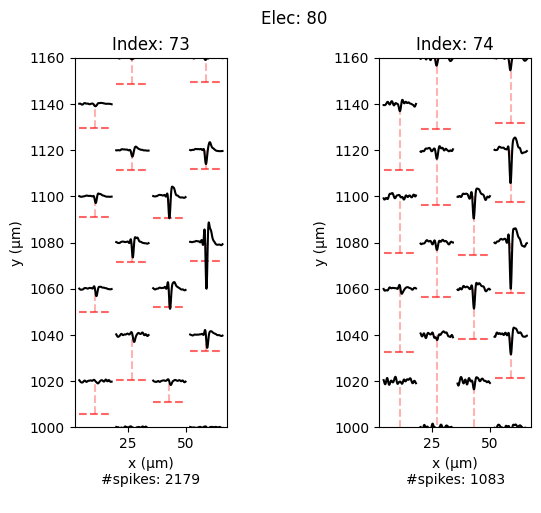

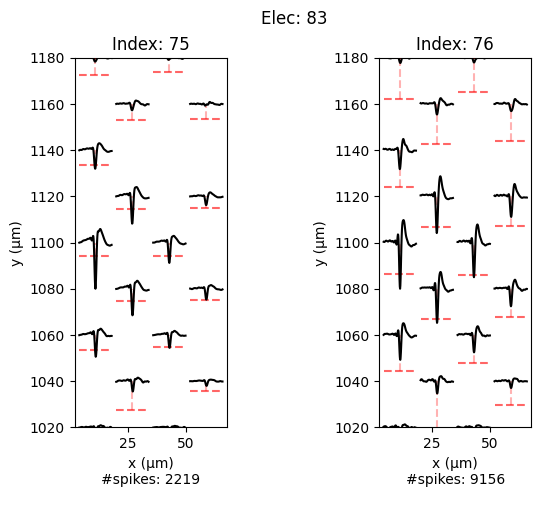

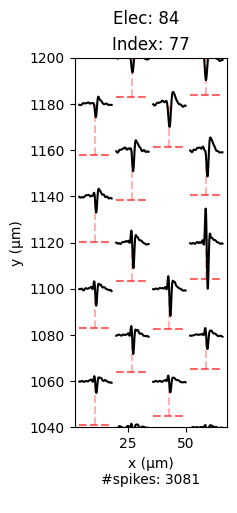

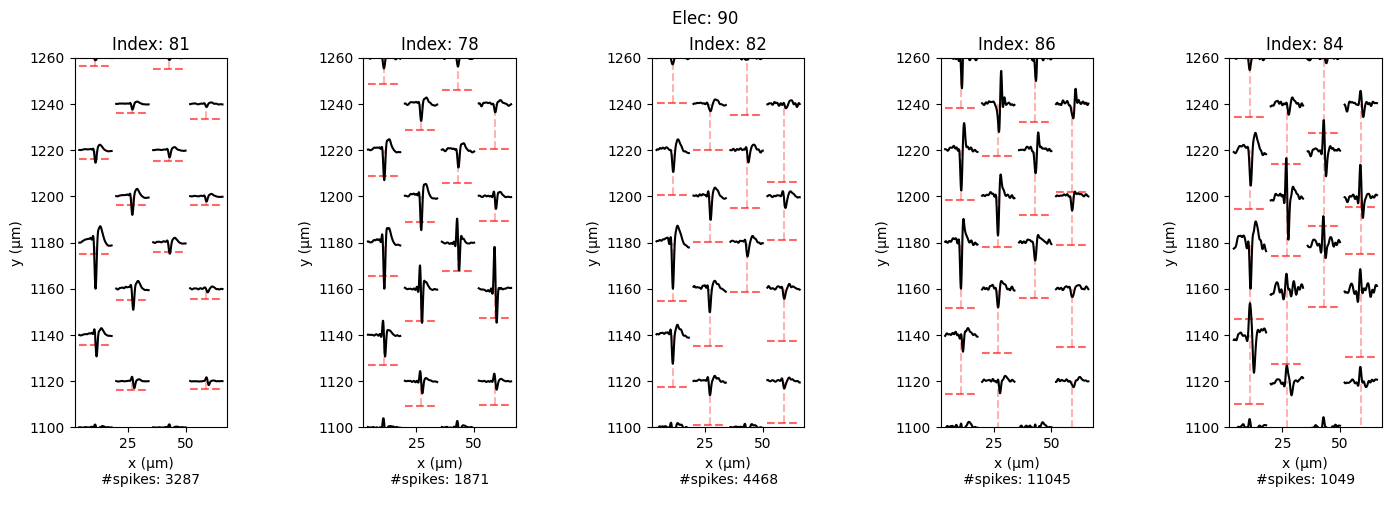

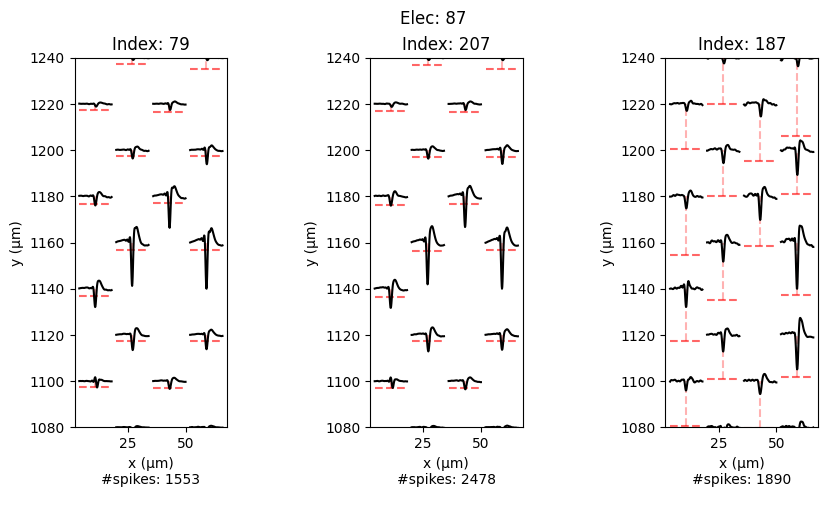

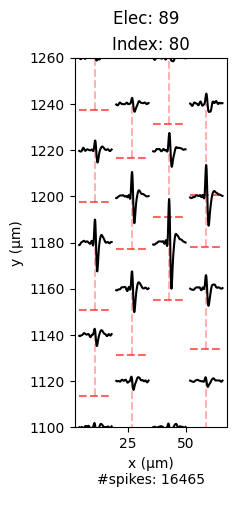

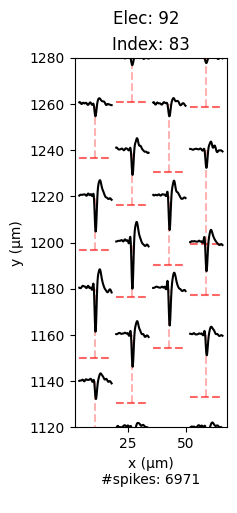

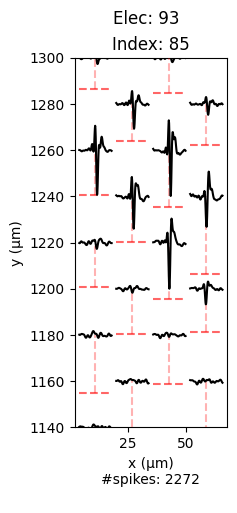

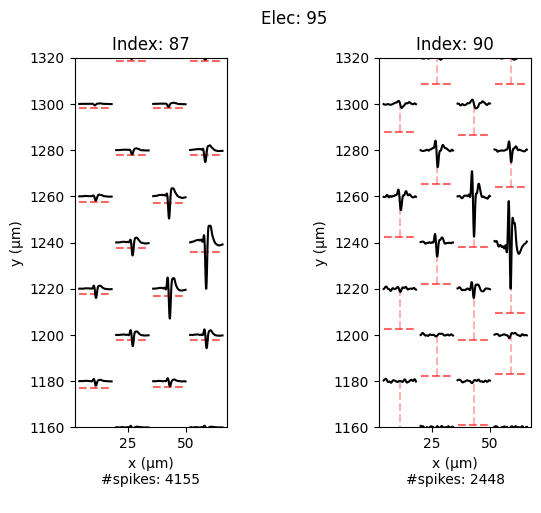

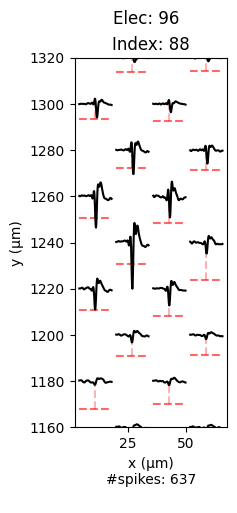

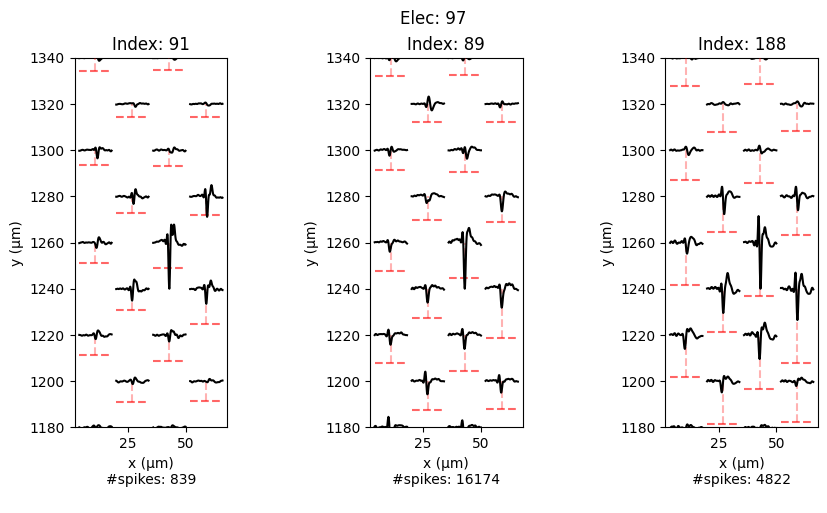

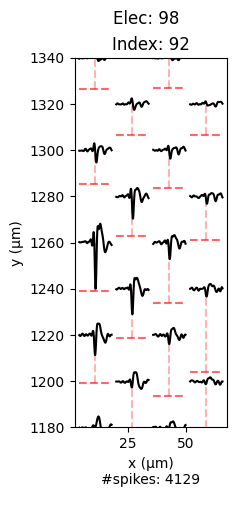

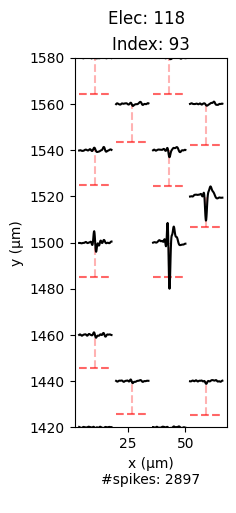

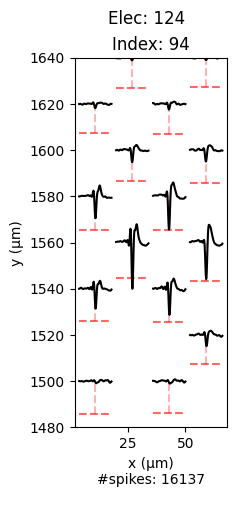

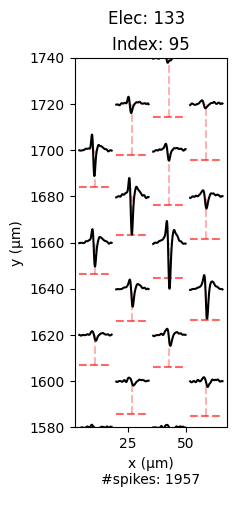

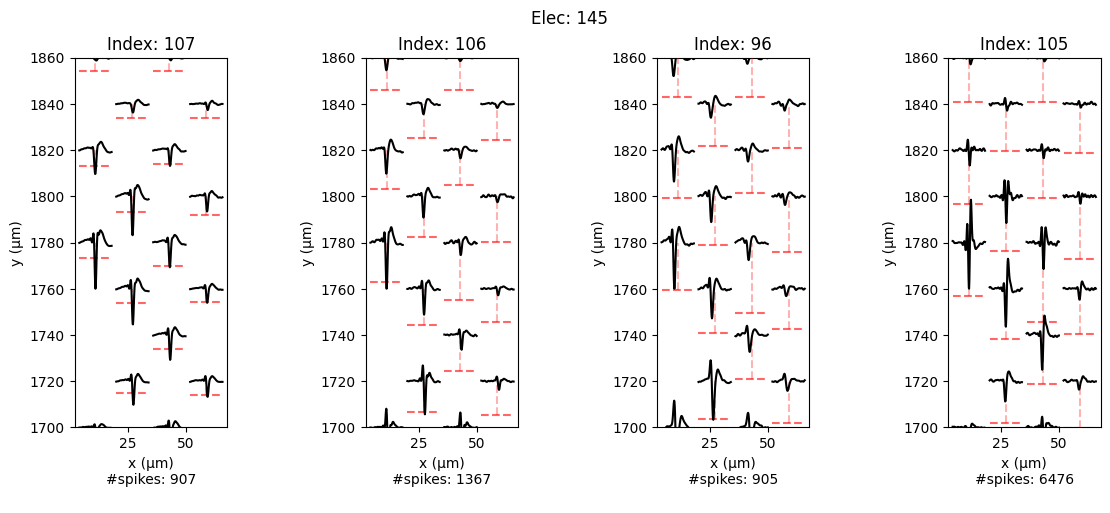

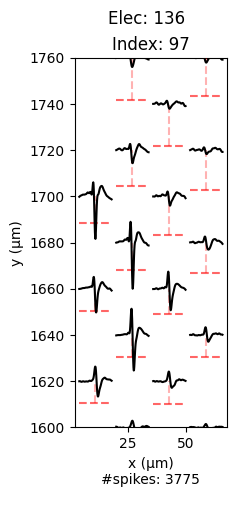

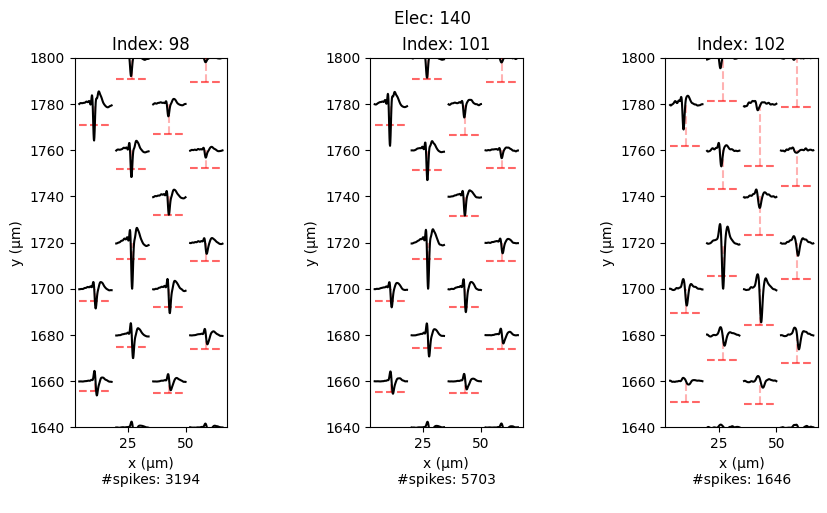

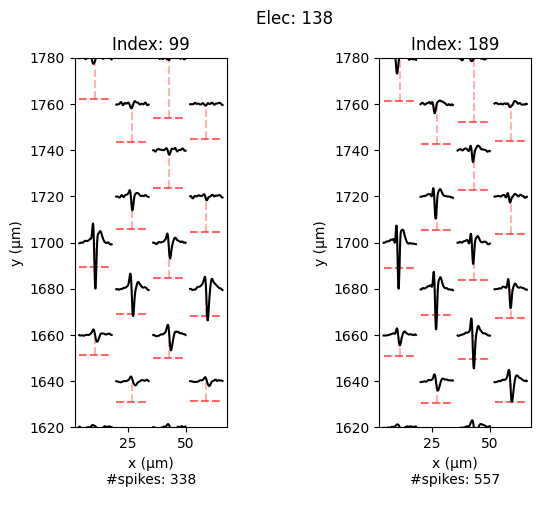

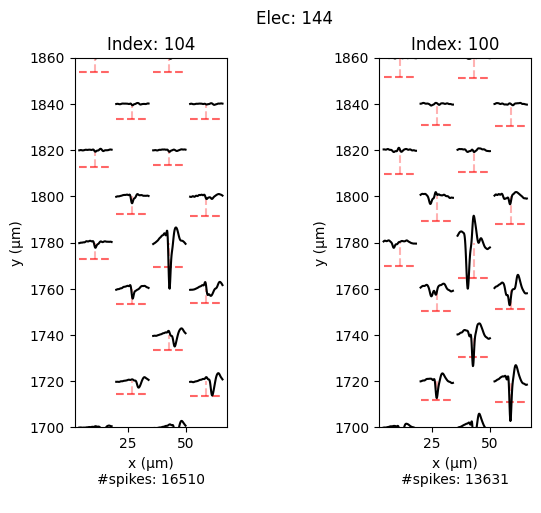

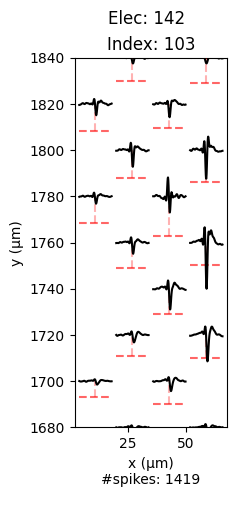

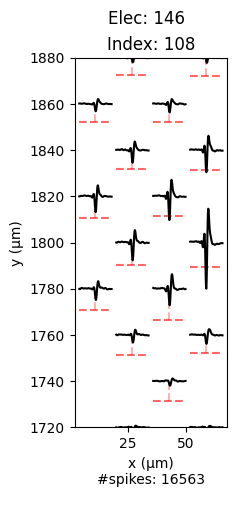

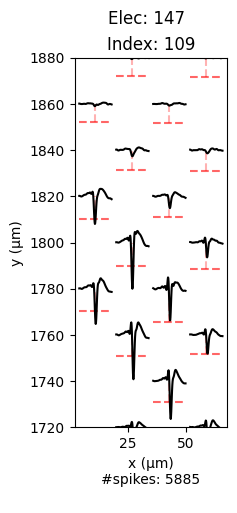

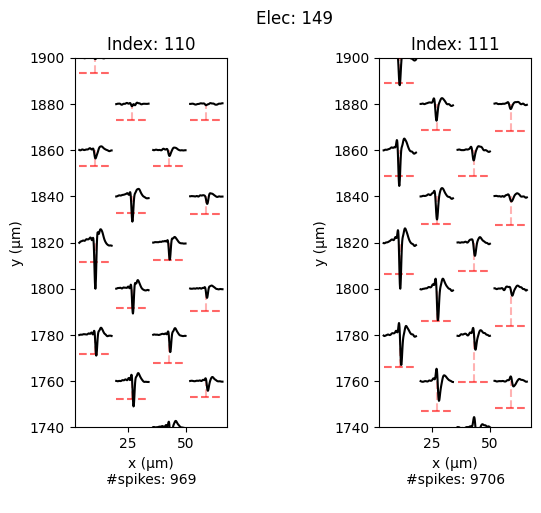

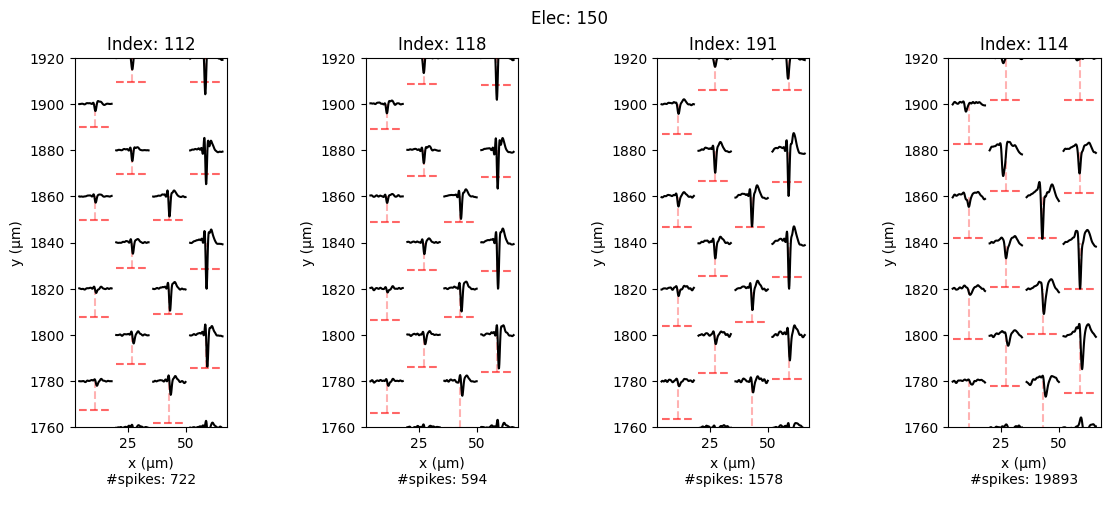

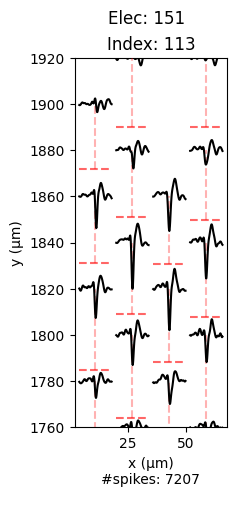

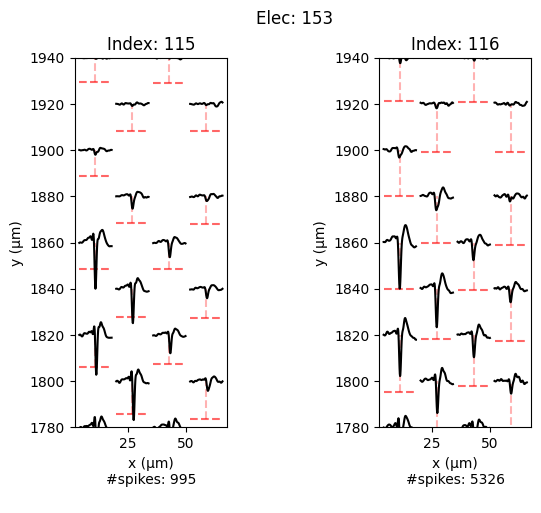

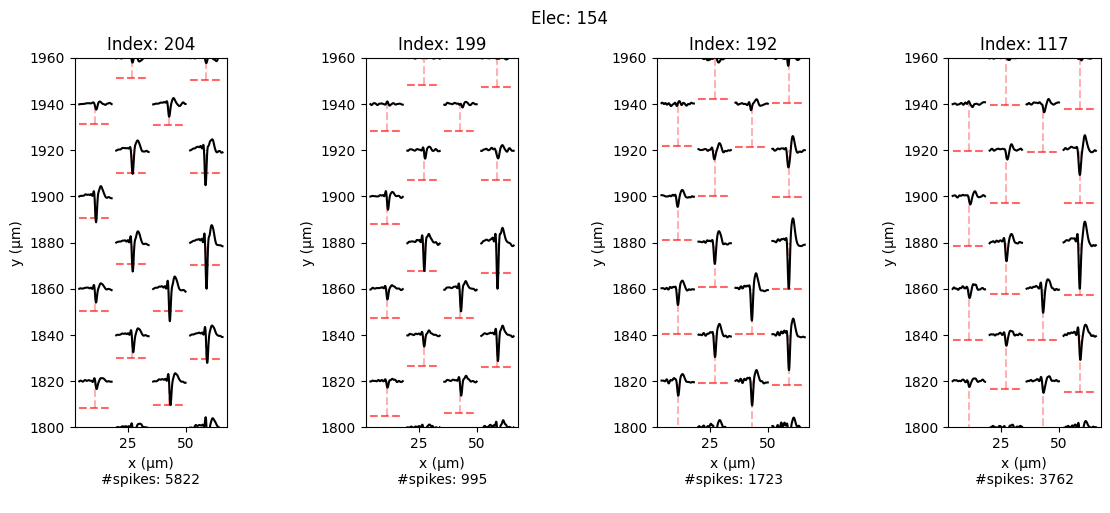

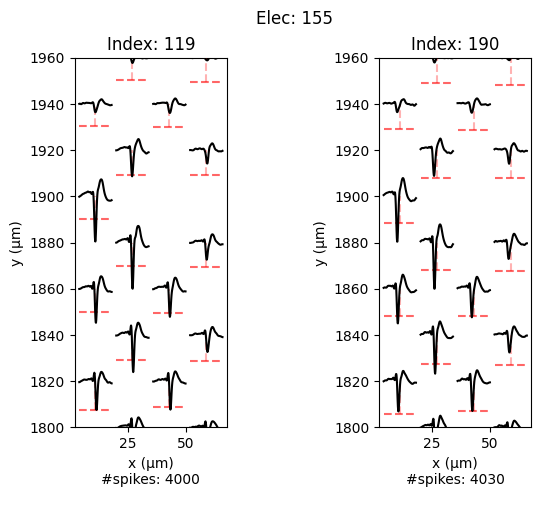

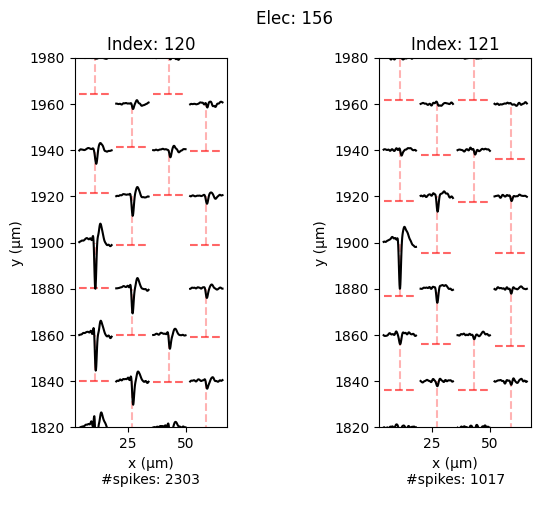

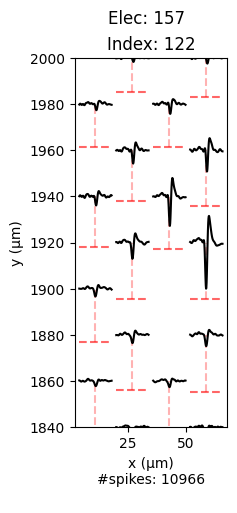

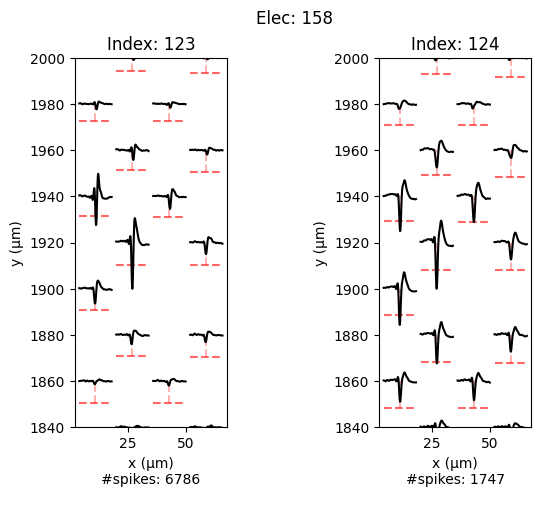

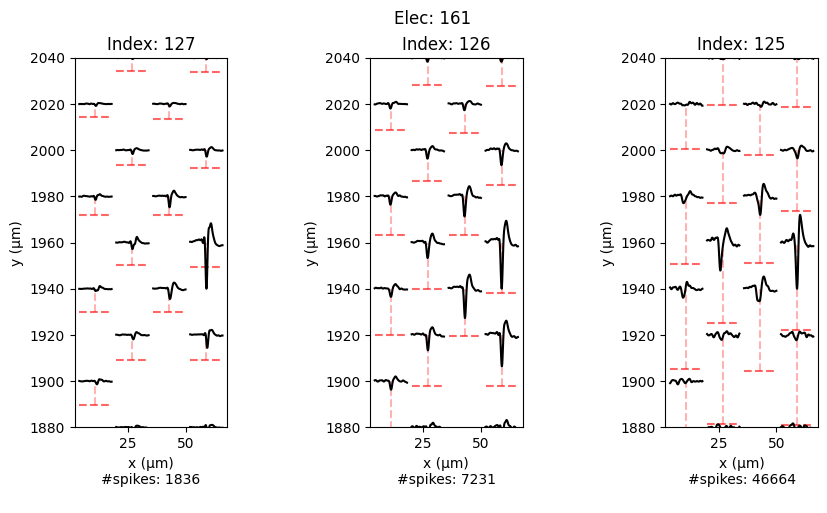

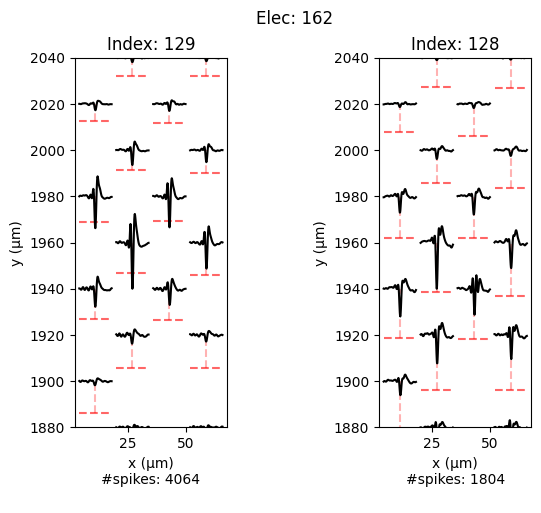

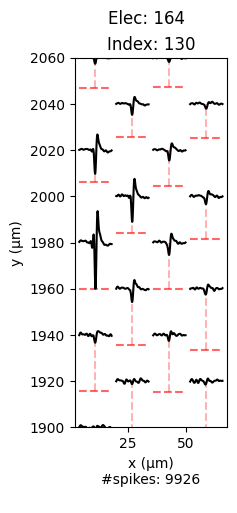

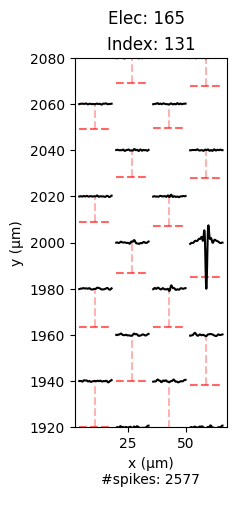

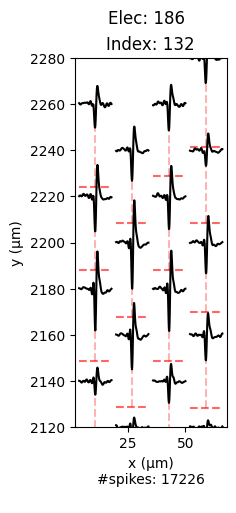

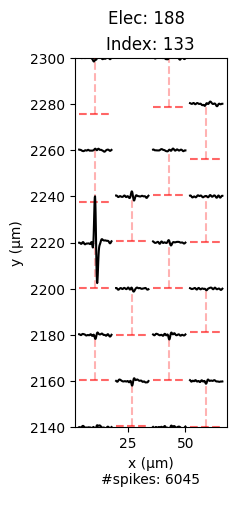

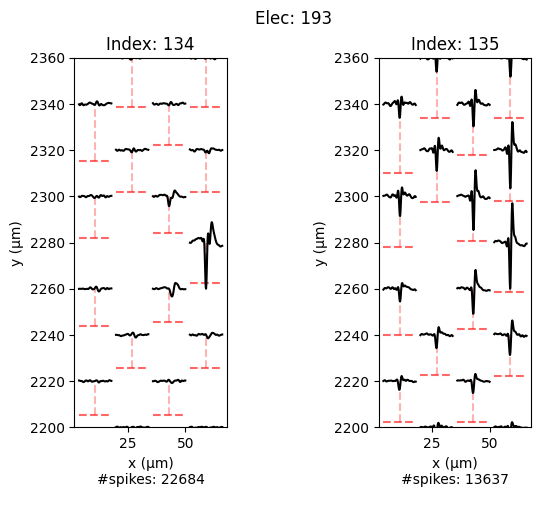

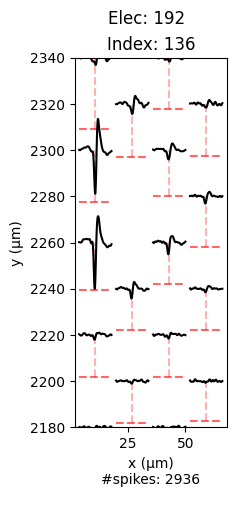

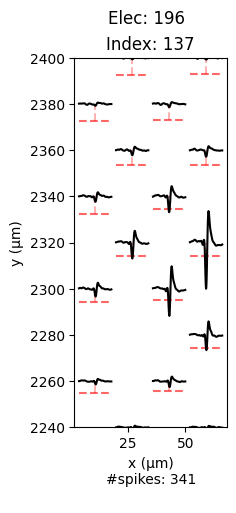

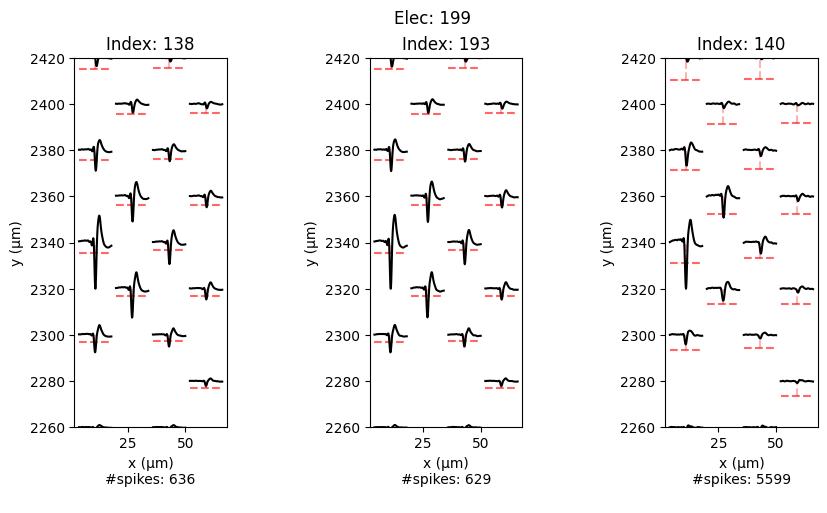

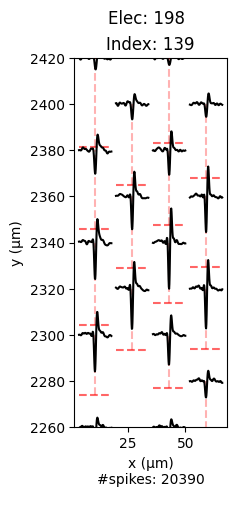

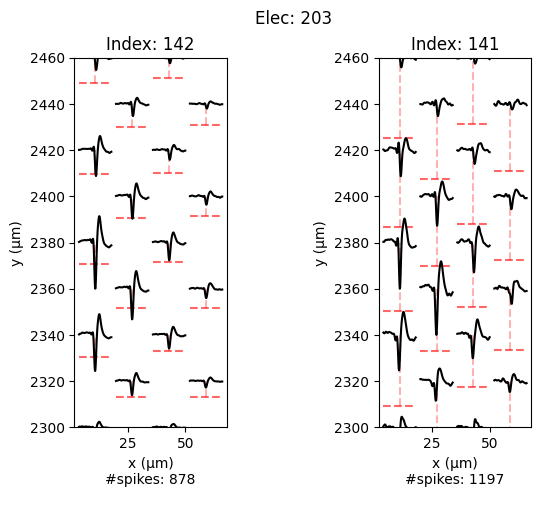

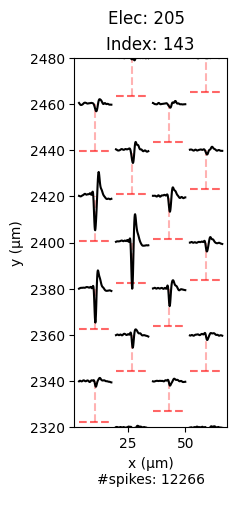

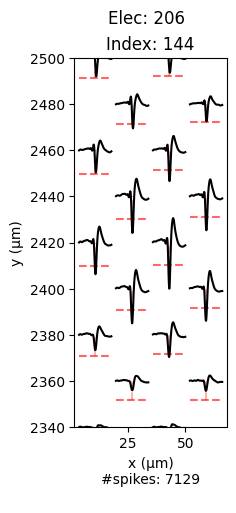

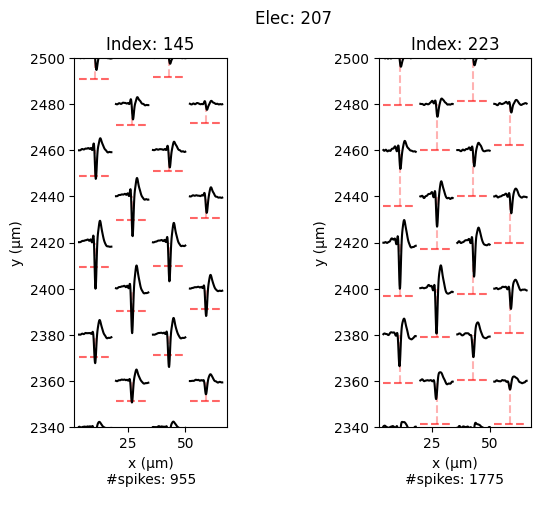

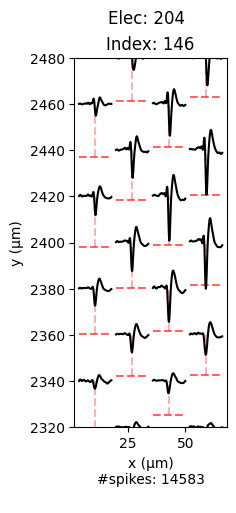

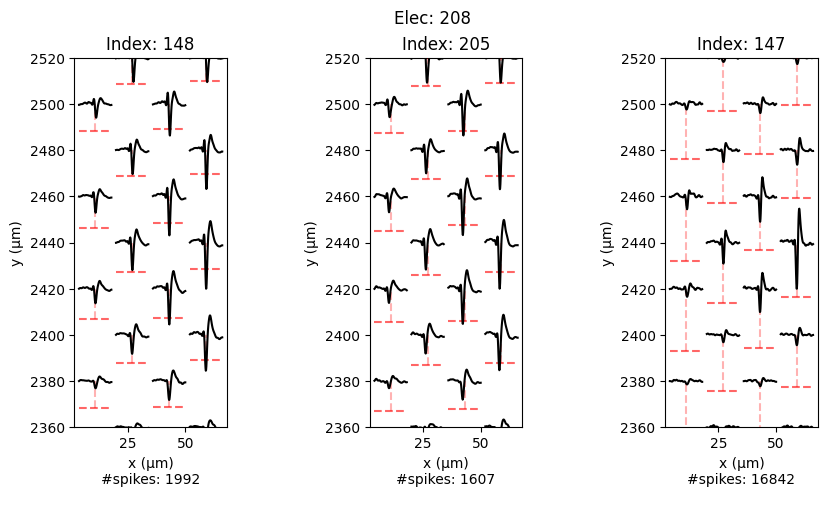

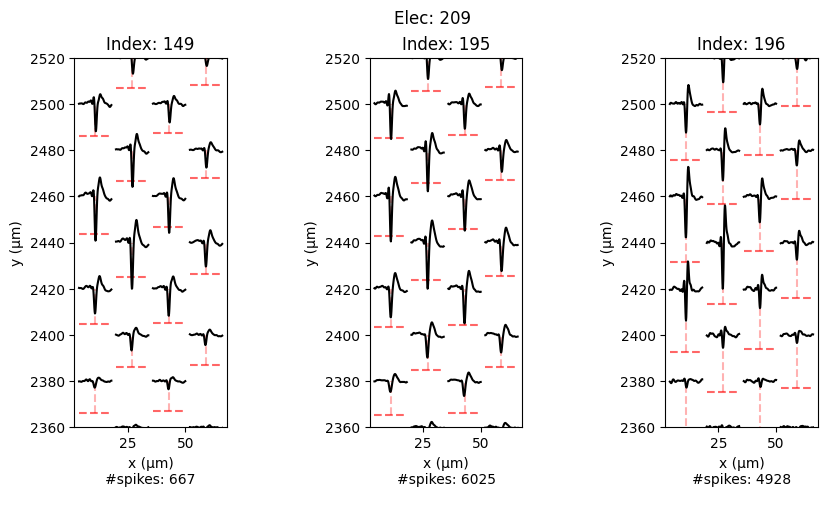

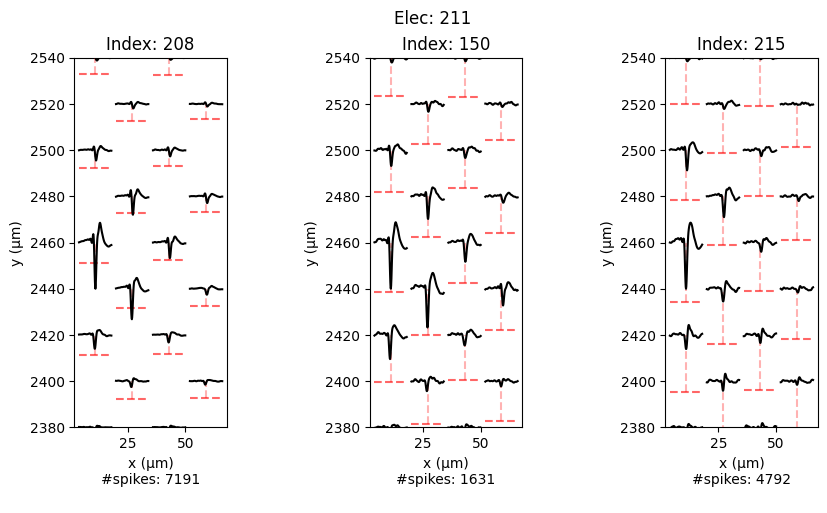

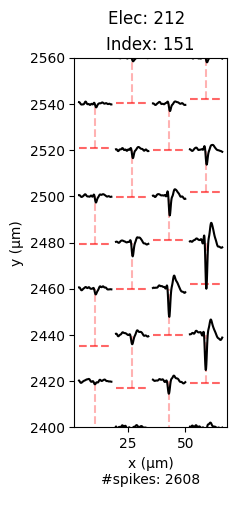

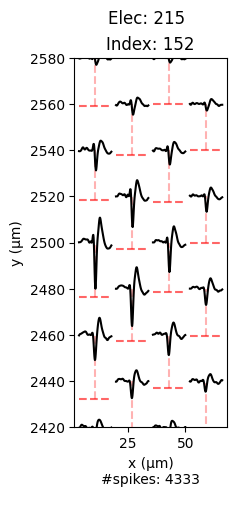

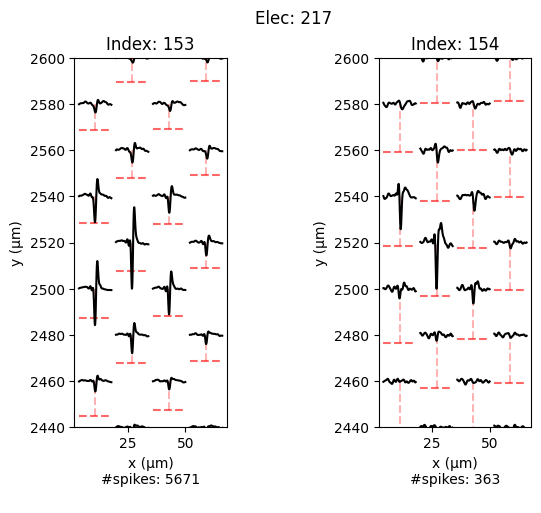

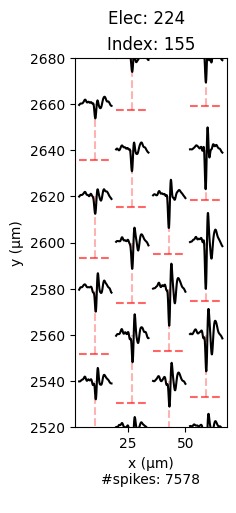

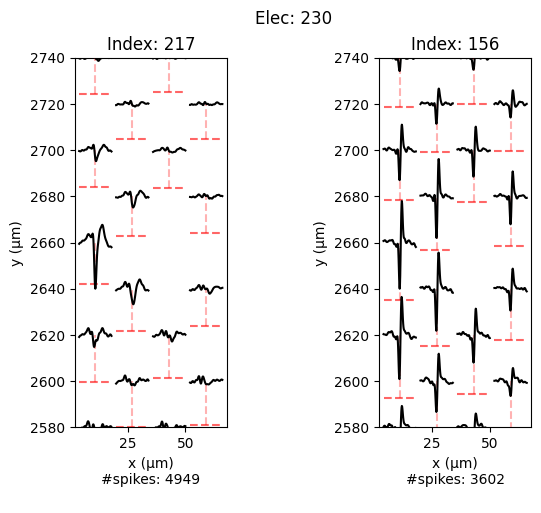

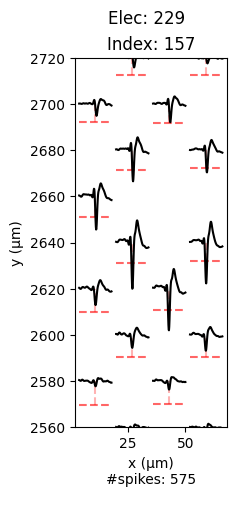

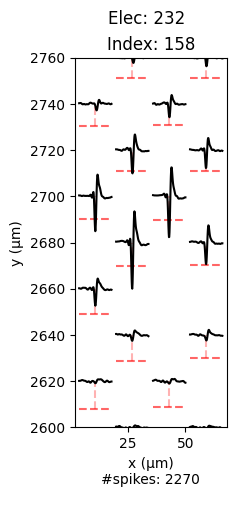

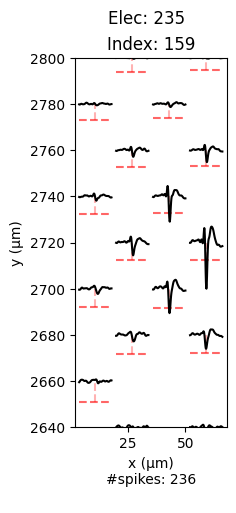

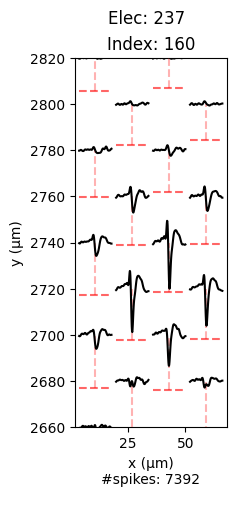

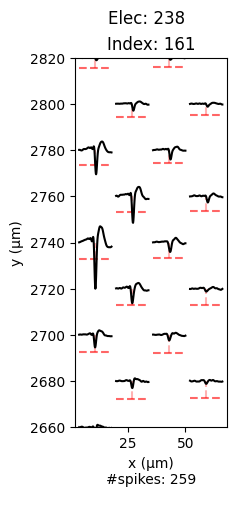

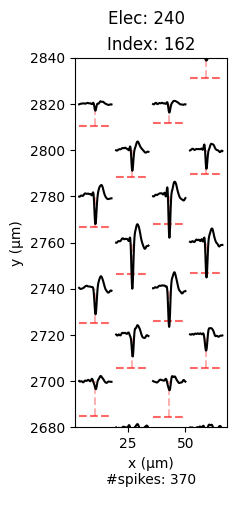

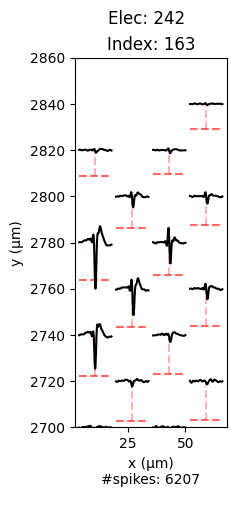

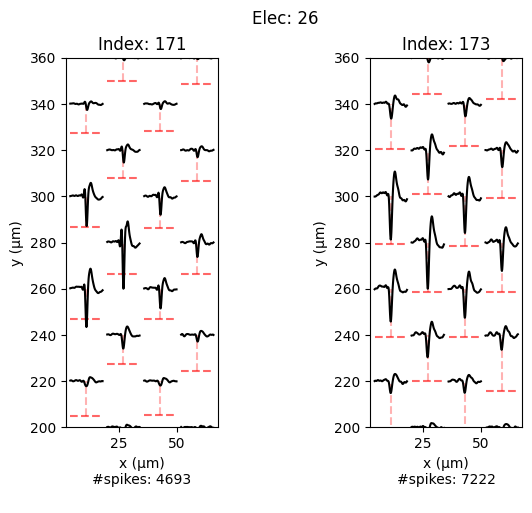

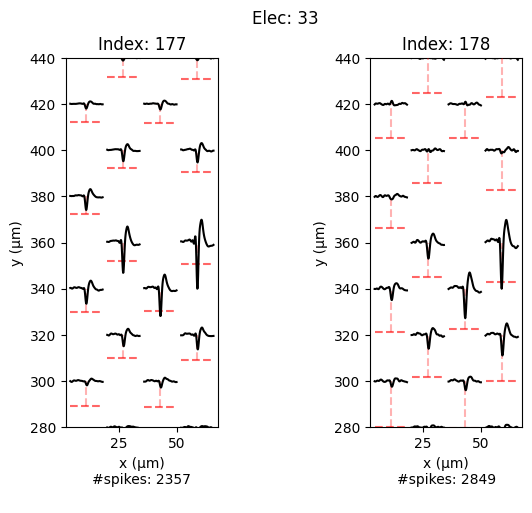

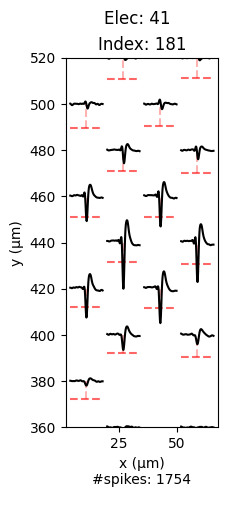

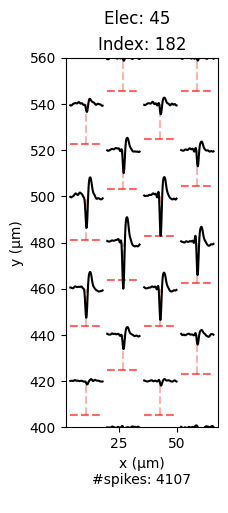

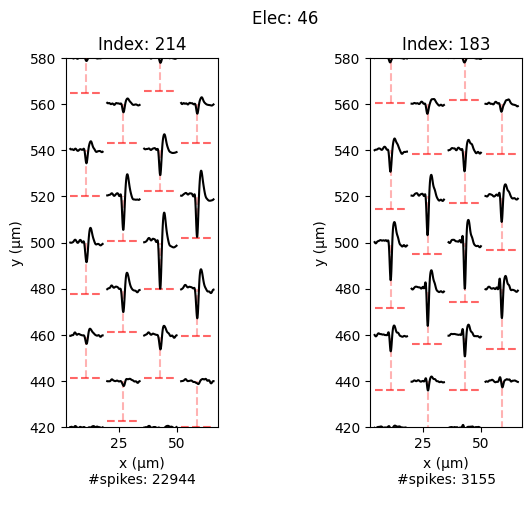

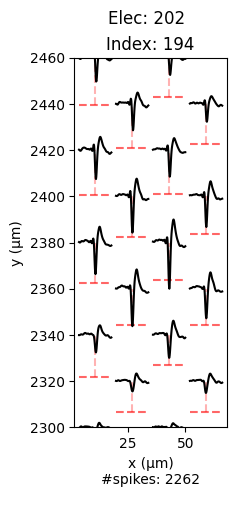

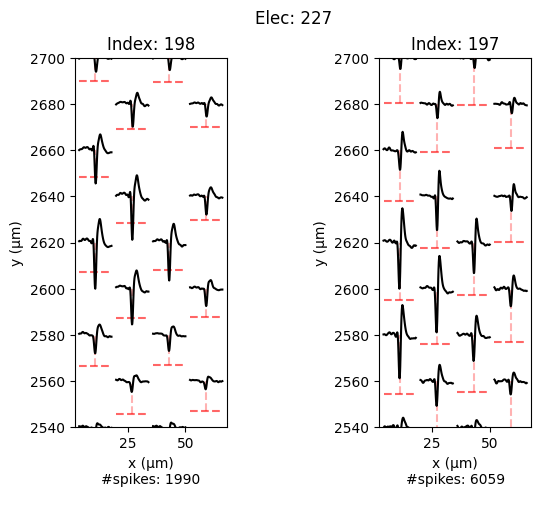

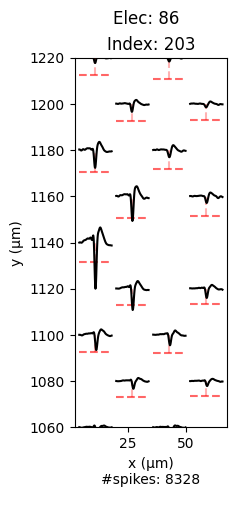

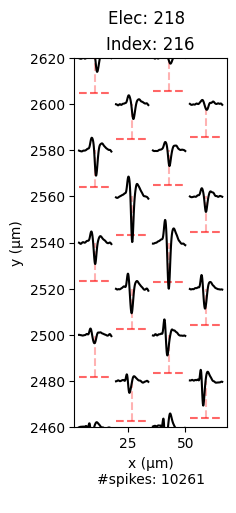

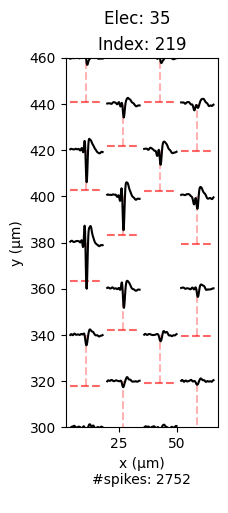

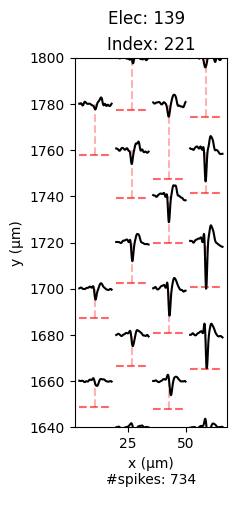

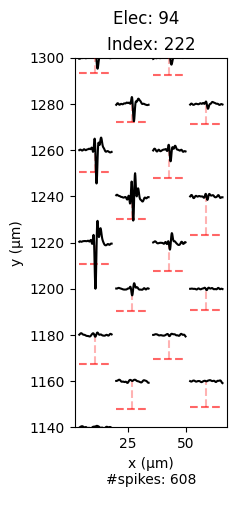

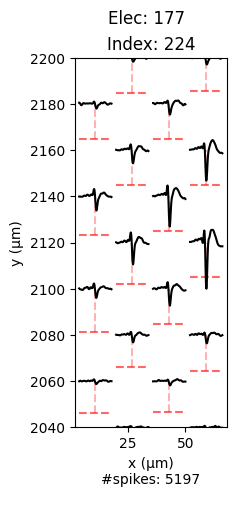

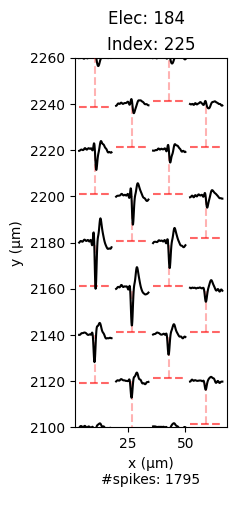

In [39]:
for elec, units in elec_to_units.items():
    num_cols = len(units)
    fig, axes = plt.subplots(1, num_cols, figsize=(3.6*num_cols, 4.8)) 
    axes = np.atleast_1d(axes)
    
    unit_amps = [np.min(unit.templates) for unit in units]
    order = np.argsort(unit_amps)
    
    for a, idx in enumerate(order):
        ax = axes[a]
        unit = units[idx]
        if a == 0:
            kwargs = unit.plot(axis=ax, chans_rms=CHANS_RMS, return_kwargs=True)
        else:
            unit.plot(axis=ax, chans_rms=CHANS_RMS)
        
        xlabel = ax.get_xlabel()
        ax.set_xlabel(f"""{xlabel}
#spikes: {len(unit)}
                      """)
        
            # axes[1+i].text(np.mean(XLIM), ymin-13,
            #           f"Overlap Score: {score:.3f}\n"
            #           f"Num overlap: {int(score*num_spikes)}\n"
            #           f"Num spikes: {num_spikes}",
            #           horizontalalignment='center',verticalalignment='top',
            #           fontweight="normal")
        
    
    fig.suptitle(f"Elec: {elec}")
    plt.show()